<a href="https://colab.research.google.com/github/broskunta/PyTorch-Linear-Regression/blob/main/Linear_Regression_1D_Training_Two_Parameter_Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression 1D; Training Two Parameters Mini-Batch Gradient Descent using in-built PyTorch functions.

### Preparation

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [7]:
# class for ploting

class plot_error_surfaces(object):

    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()

    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())

    # Plot diagram
    def final_plot(self):
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

Make Some Data

In [4]:
#import required libraries
import torch
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

In [8]:
# Create Data Class

class Data(Dataset):

    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self,index):
        return self.x[index],self.y[index]

    # Get Length
    def __len__(self):
        return self.len

In [9]:
# data object
dataset = Data()


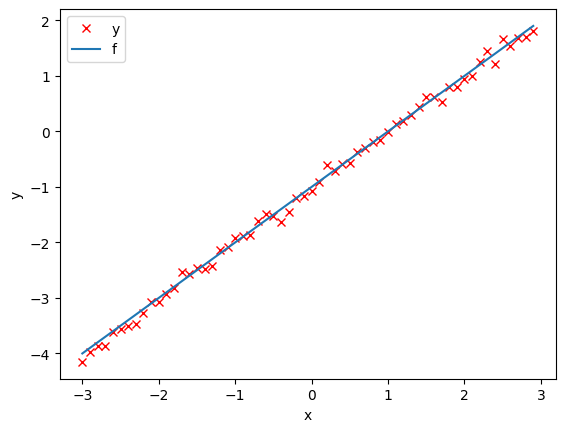

In [10]:
# plot data
plt.plot(dataset.x.numpy(), dataset.y.numpy(), 'rx', label = 'y')
plt.plot(dataset.x.numpy(), dataset.f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


### Create the model and Loss Function

In [11]:
#import libraries

from torch import nn, optim

In [12]:
# create class for nn modules

class linear_regression(nn.Module):

    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [13]:
# cost function
criterion = nn.MSELoss()

In [14]:
# Create a linear regression object and optimizer object, the optimizer object will use the linear regression object.

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3636]], requires_grad=True),
 Parameter containing:
 tensor([0.4957], requires_grad=True)]

In [16]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [17]:
# create a dataloader
trainloader = DataLoader(dataset=dataset, batch_size=1)

In [18]:
# create the weight and bias
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10

In [19]:
# create a plot surface
get_surface = plot_error_surfaces(15,13,dataset.x, dataset.y, 30, go =False)

### Train the model

In [20]:
# def the train model function

def train_model(epochs):
    for epoch in range(epochs):
        for x,y in trainloader:
            #make pred
            yhat = model(x)
            #calculate loss
            loss = criterion(yhat, y)
            # surface plot
            get_surface.set_para_loss(model, loss.tolist())
            #zero grad
            optimizer.zero_grad()
            #back pas
            loss.backward()
            #update parameters
            optimizer.step()
        get_surface.plot_ps()



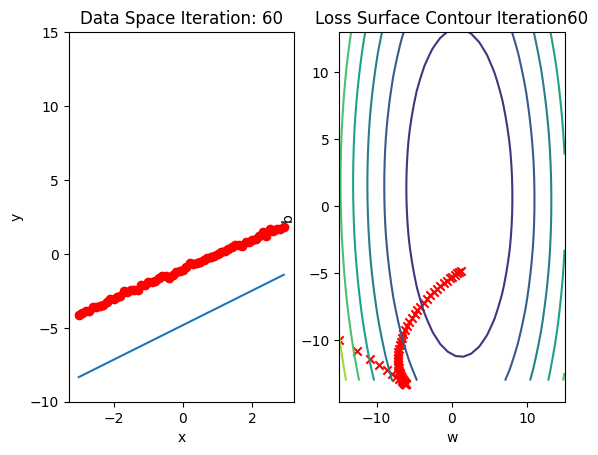

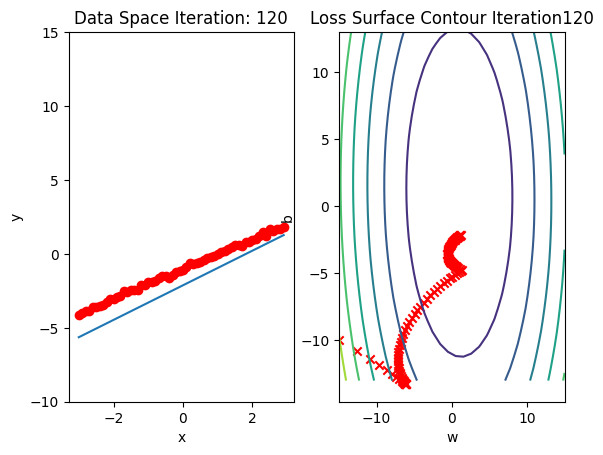

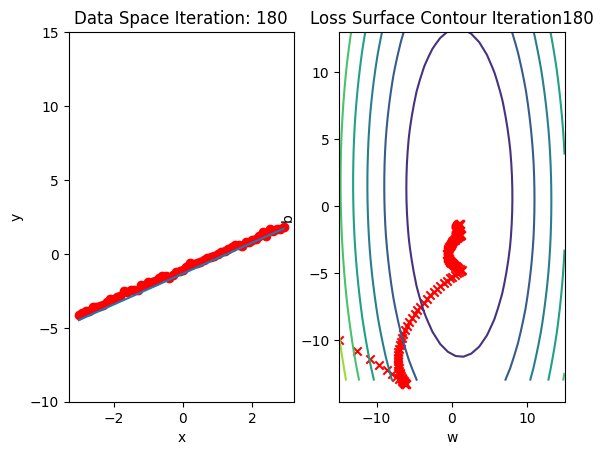

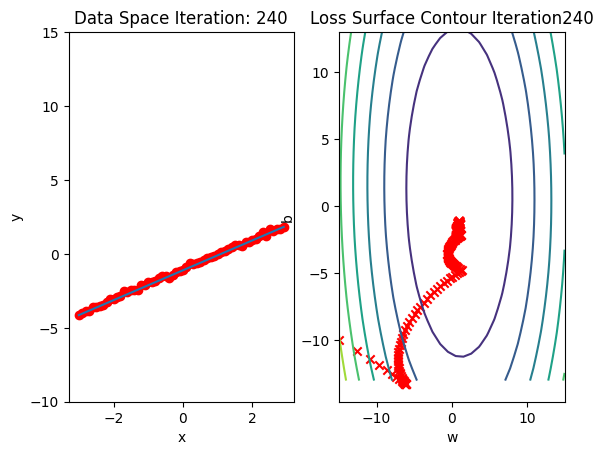

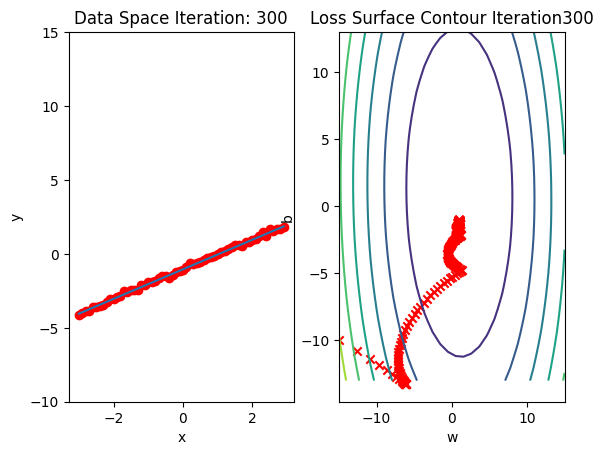

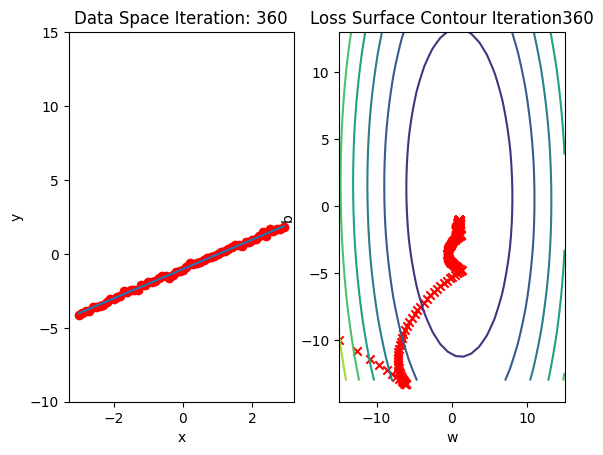

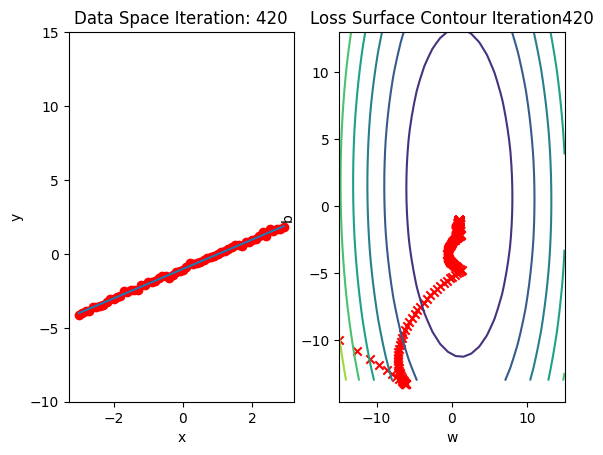

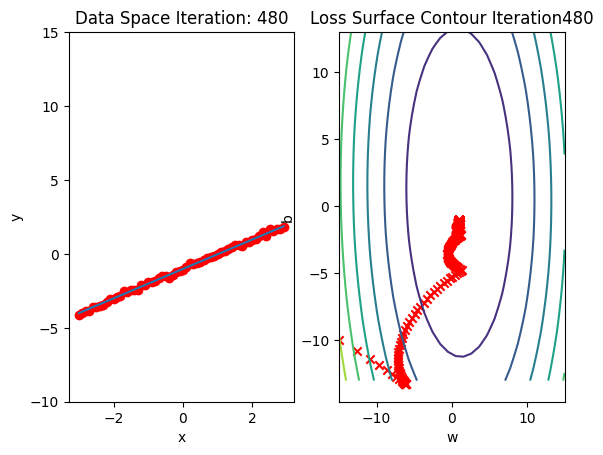

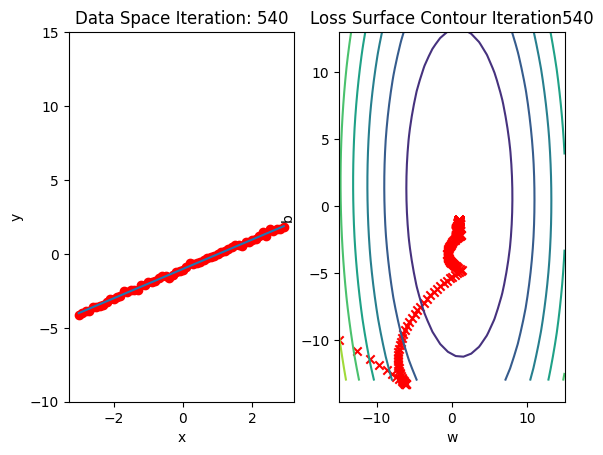

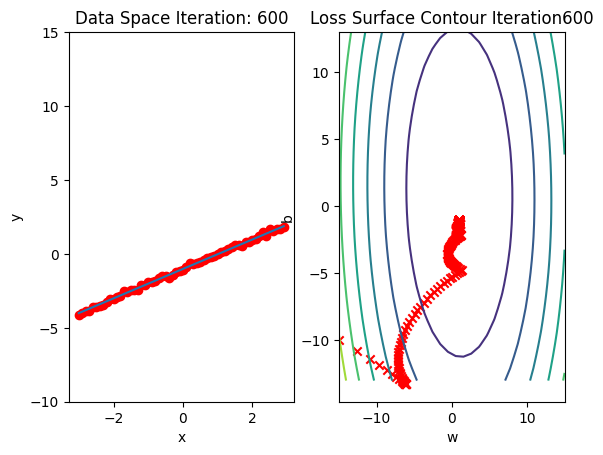

In [21]:
#train model for 10 iterations
train_model(10)

In [22]:
# check the model stat dict
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.9932]])),
             ('linear.bias', tensor([-1.0174]))])

### Training the model using BGD

In [31]:
# Create a linear regression object and optimizer object, the optimizer object will use the linear regression object.

# Create a linear regression object and optimizer object, the optimizer object will use the linear regression object.

model = linear_regression(1,1)
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [25]:
#CREATE PARAMETERS
model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)
LOSS_BGD = []

In [32]:
def train_model_BGD(epochs):
    for epoch in range(epochs):
        for x,y in trainloader:
            #make pred
            yhat = model(x)
            #calculate loss
            loss = criterion(yhat, y)
            # surface plot
            get_surface.set_para_loss(model, loss.tolist())
            #zero grad
            optimizer.zero_grad()
            #back pas
            loss.backward()
            #update parameters
            optimizer.step()
        get_surface.plot_ps()

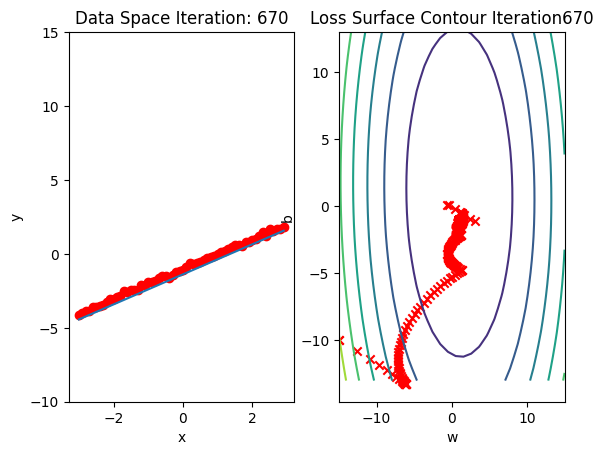

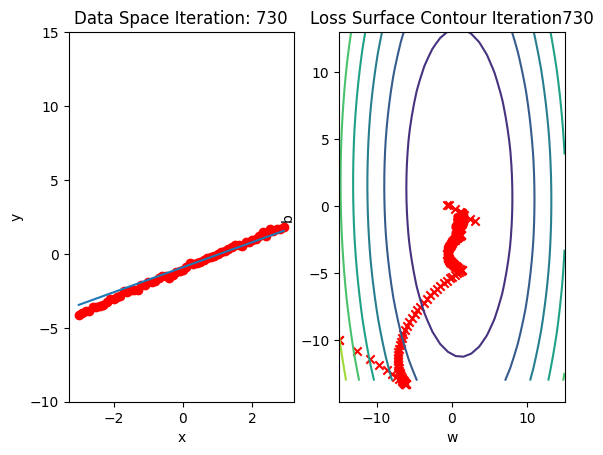

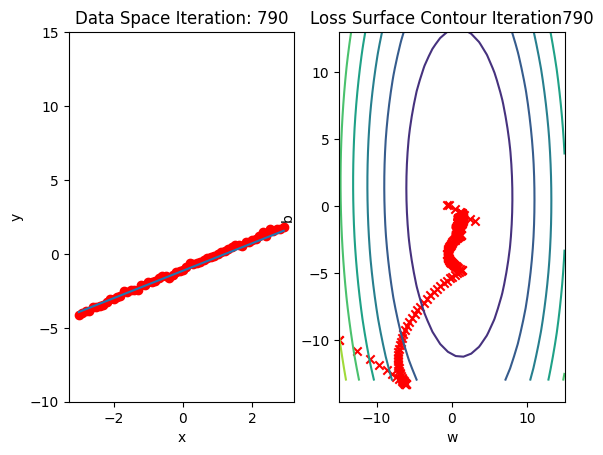

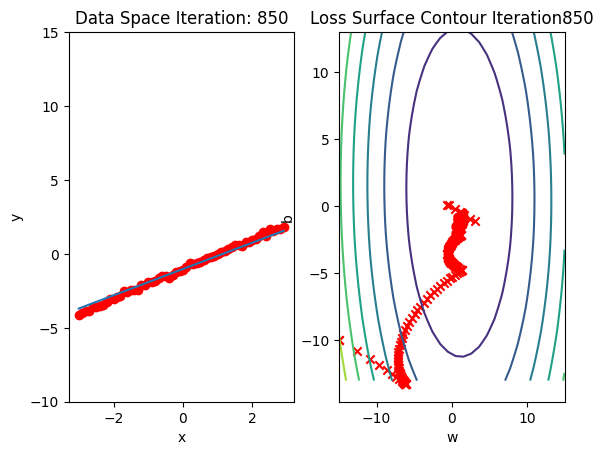

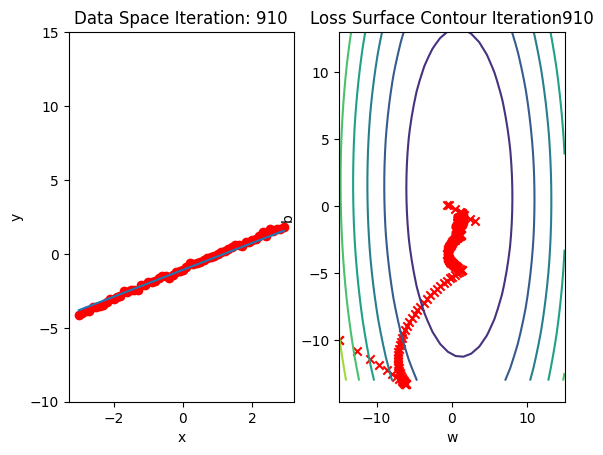

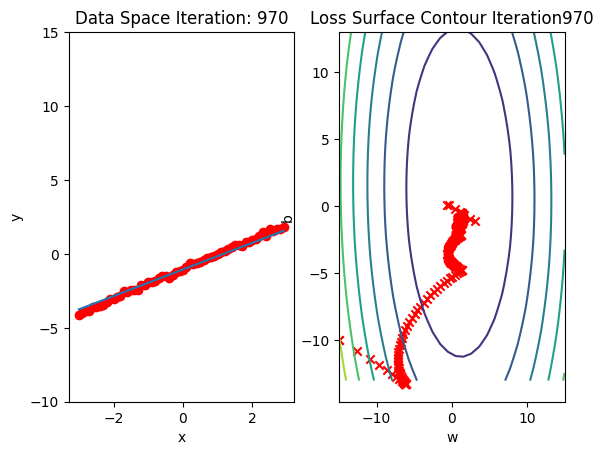

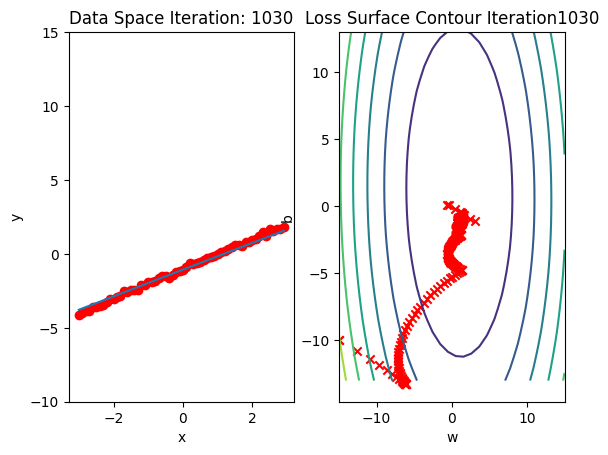

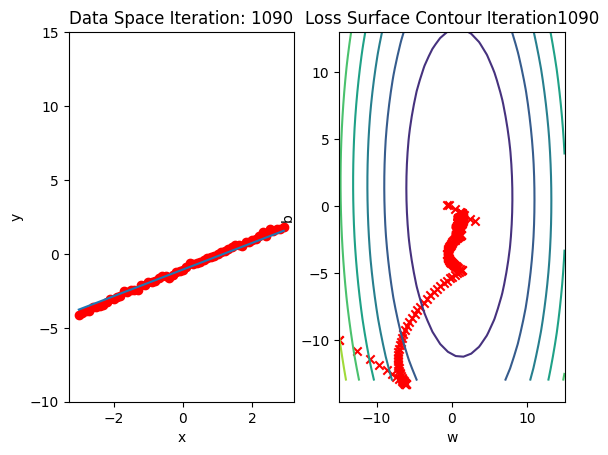

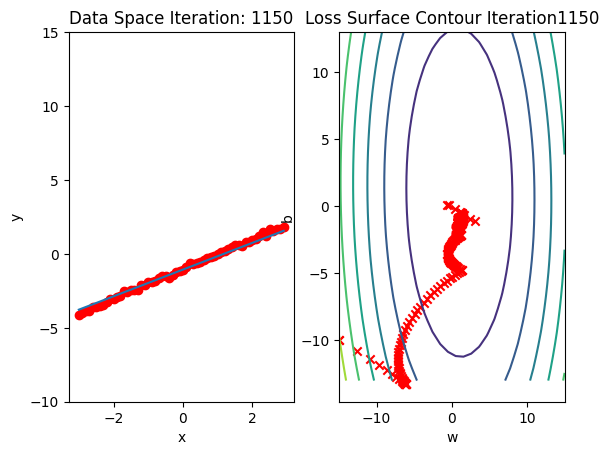

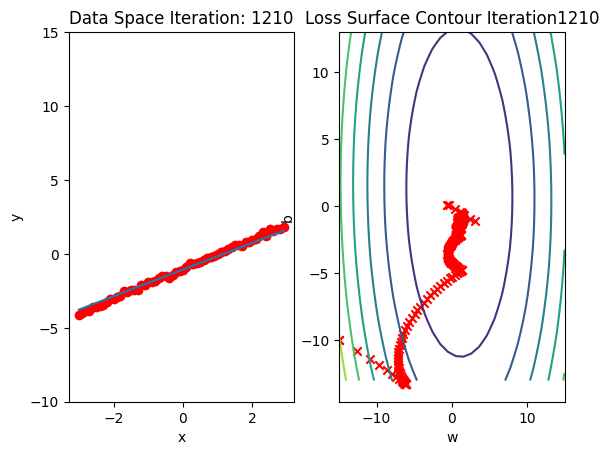

In [33]:
train_model_BGD(10)

In [30]:
# create model

def train_model_SGD(epochs):
    for epoch in range(epochs):
        #make pred
        Yhat = model(dataset.x)
        #make plots
        get_surface.set_para_loss(model, criterion(Yhat, dataset.y))
        get_surface.plot_ps()
        LOSS_BGD.append(criterion(model(dataset.x), dataset.y).tolist())

        #inner loop
        for x,y in trainloader:
            #make pred
            yhat = model(x)
            #calculate loss
            loss = criterion(yhat, y)
            # surface plot
            get_surface.set_para_loss(model, loss.tolist())
            #zero grad
            optimizer.zero_grad()
            #back pas
            loss.backward()
            #update parameters
            optimizer.step()
        get_surface.plot_ps()


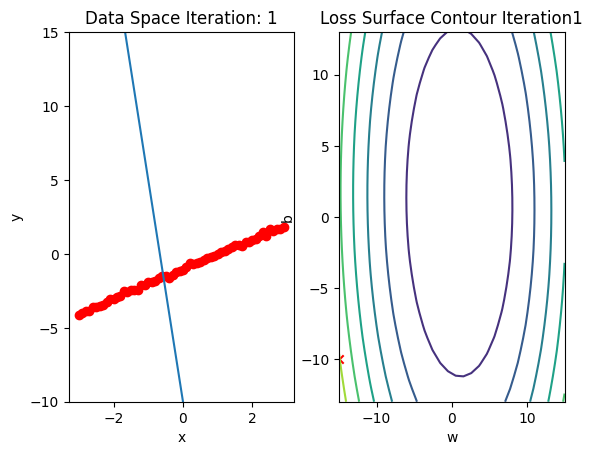

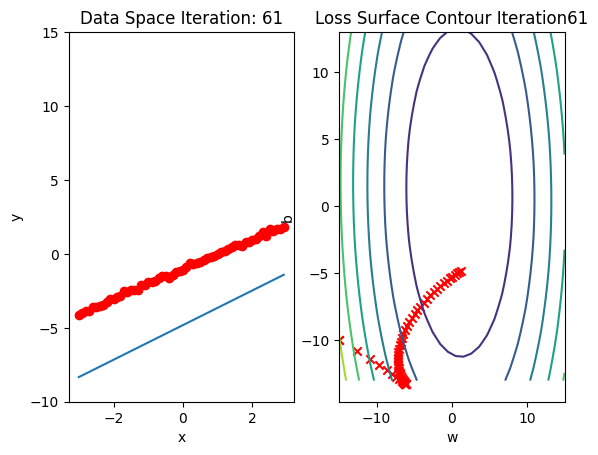

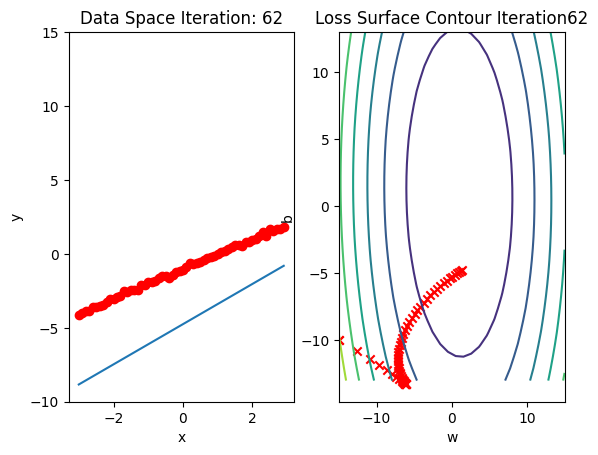

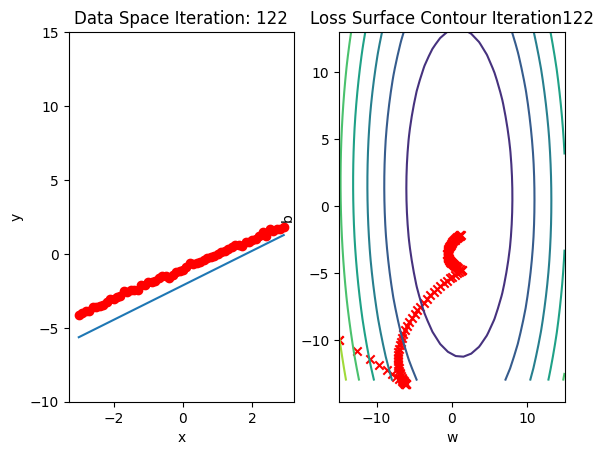

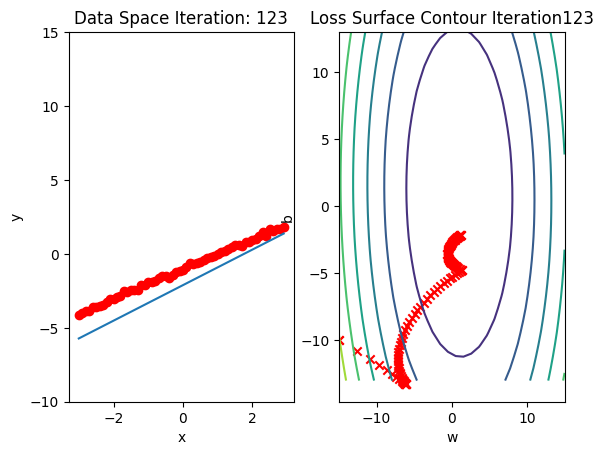

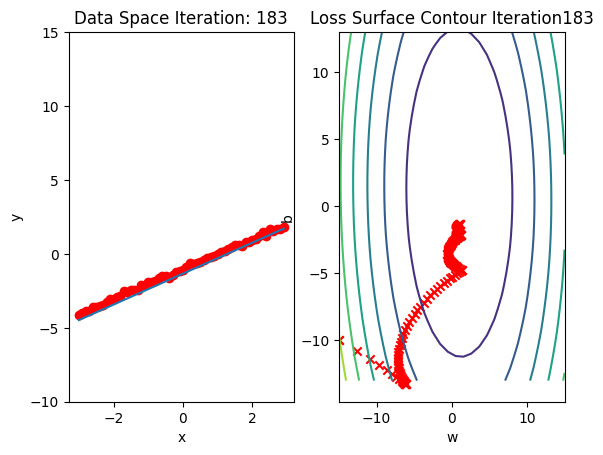

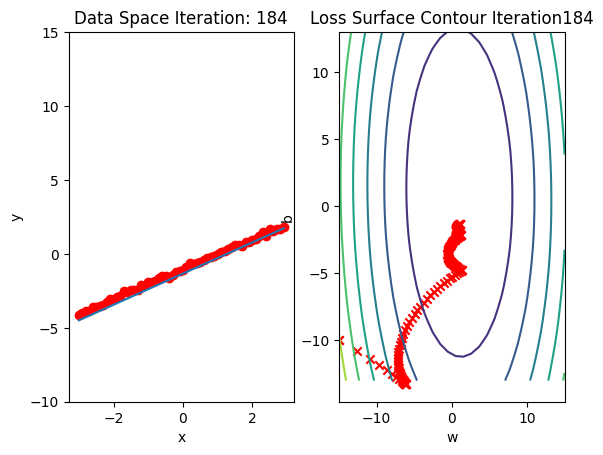

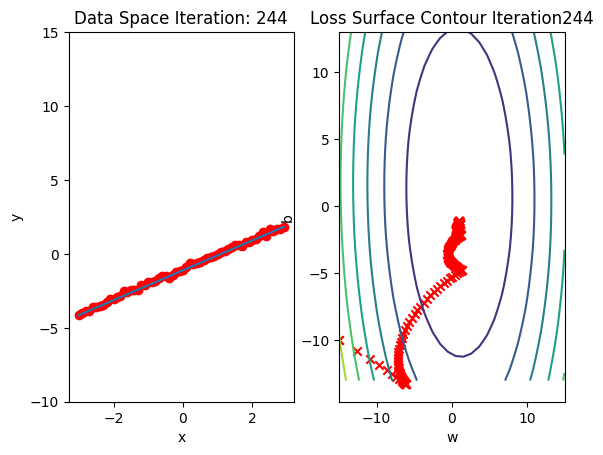

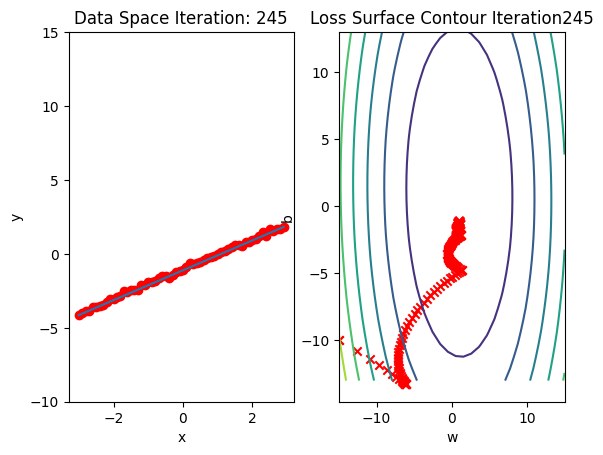

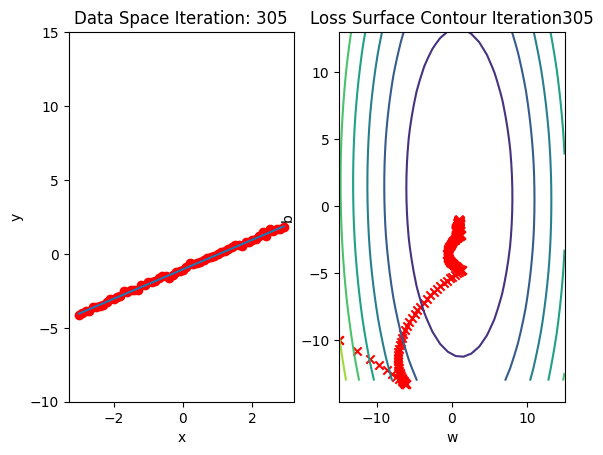

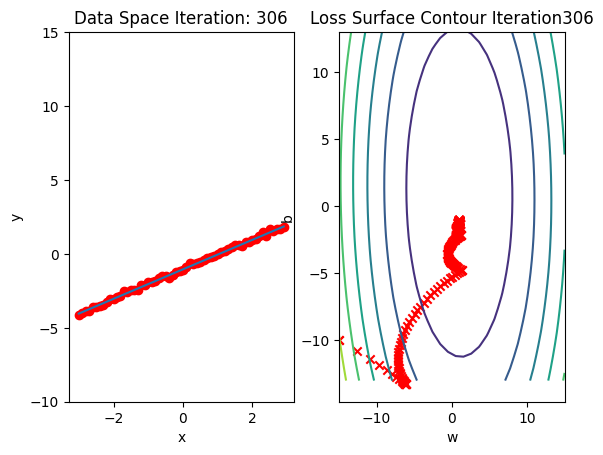

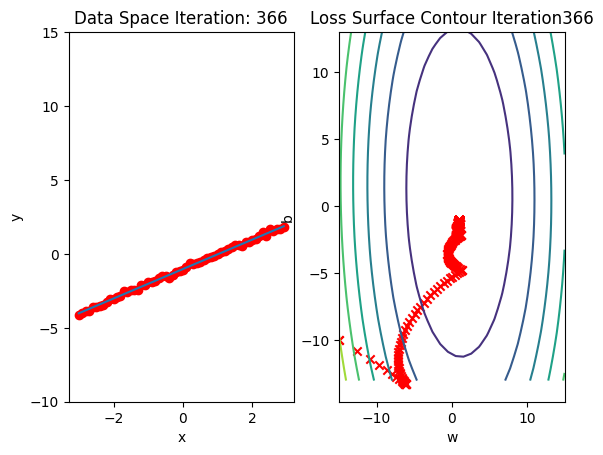

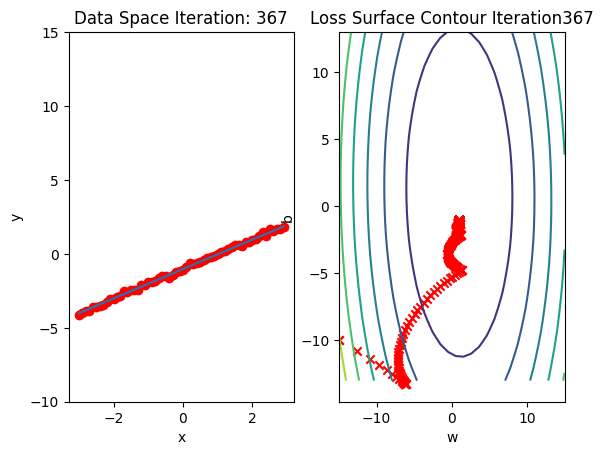

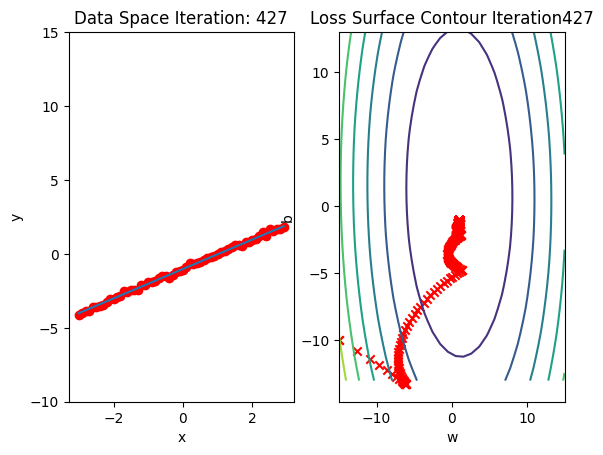

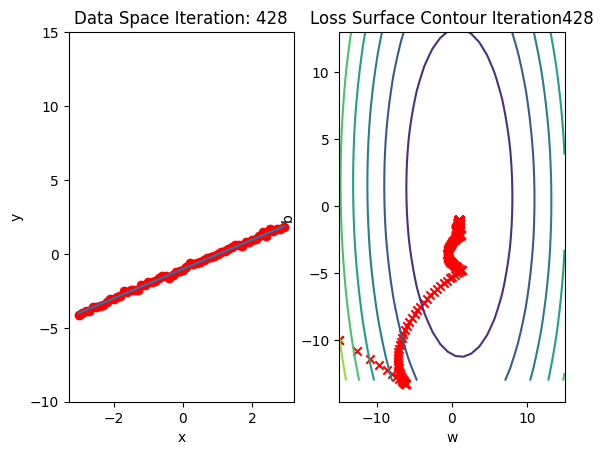

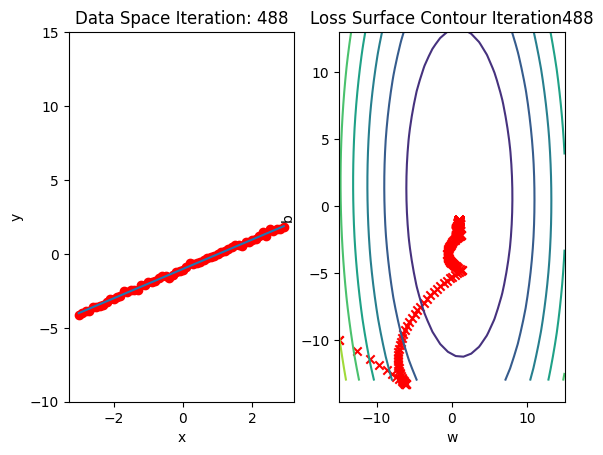

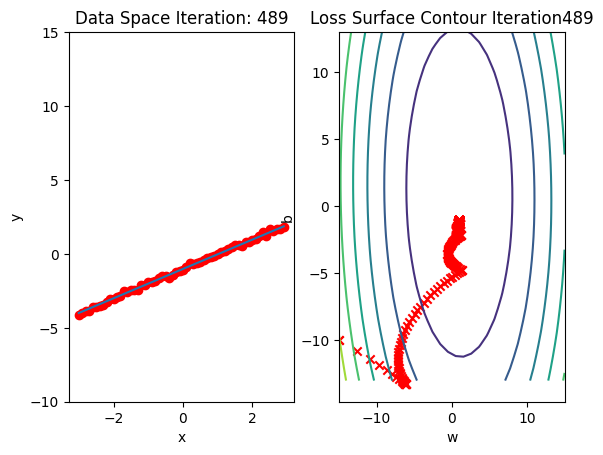

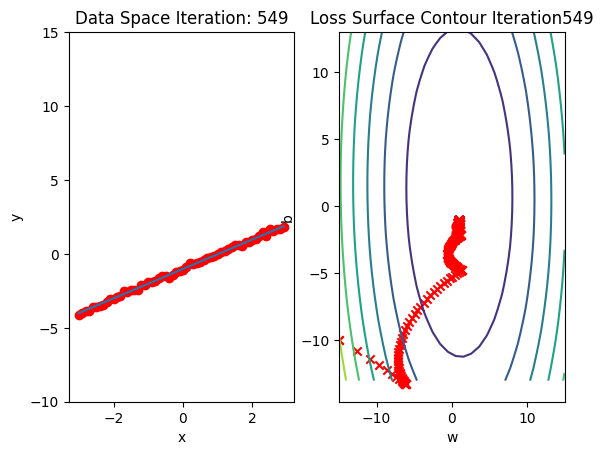

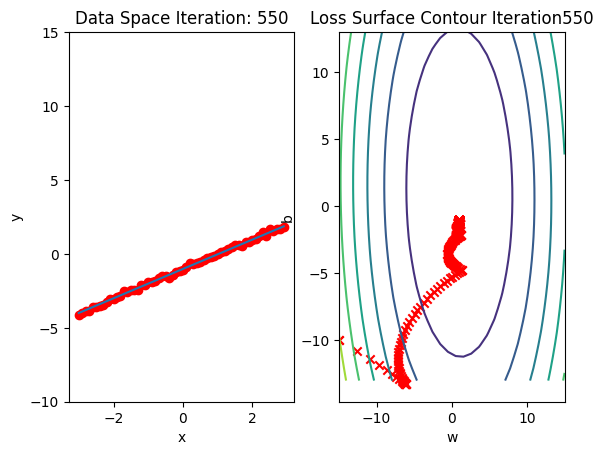

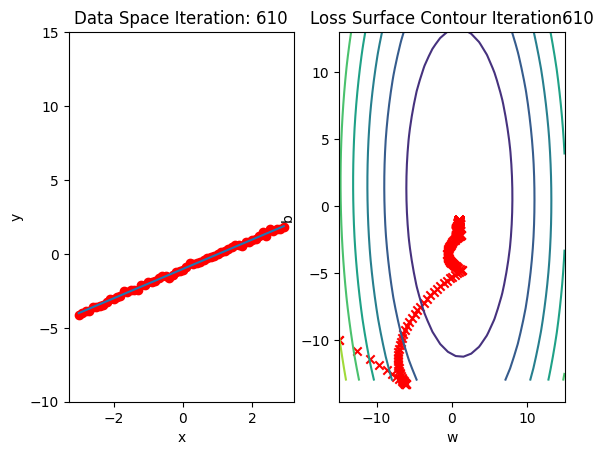

In [29]:
#train for 10 iteration
train_model_SGD(10)